# 서포트 벡터 머신
> 커널기반의 서포트 벡터머신 알고리즘을 배워보고 실습을 진행해봅시다.
- https://colab.research.google.com/github/hyunwoongko/bigdata-lecture 님의 노트북


<br><br>

### 1. 선을 조금 더 잘 그어보자

"=![](https://i0.wp.com/hleecaster.com/wp-content/uploads/2020/01/svm01.png?w=1372)

로지스틱 회귀 알고리즘에서 우리는 Sigmoid 함수와 Cross Entropy Loss를 활용해서 데이터를 분류하는 선(Decision Boundary)을 찾는 방법에 대해서 배웠습니다. 
<br><br>

![](https://i0.wp.com/hleecaster.com/wp-content/uploads/2020/01/svm02.png?resize=1536%2C1278)

만약 데이터가 3차원이라면 위처럼 평면(Hyperplane)으로 분리를 해내겠죠? 이러한 내용은 로지스틱 회귀와 미적분 시간에 모두 다루었습니다. 
<br><br>

![](https://i1.wp.com/hleecaster.com/wp-content/uploads/2020/01/svm03.png?w=1280)

그런데 이러한 선이나 면은 위 처럼 매우 다양하게 그릴 수 있습니다. 그렇다면 **과연 어떻게 분리해내는게 좋은 방법일까요?** 위 그림의 C나 B를 보면 파란색쪽에 너무 아슬아슬하게 붙어있습니다. **만약 값이 조금 큰 파란색 샘플이 들어오면 오답으로 예측할 것입니다.** 그에 비해 F는 어느정도는 여유가 있죠
<br><br>

![](https://i0.wp.com/hleecaster.com/wp-content/uploads/2020/01/svm04.png?w=1280)

서포트 벡터 머신은 로지스틱 회귀에서 한 단계 더 발전해서 분류하기 좋은, 최적의 선을 찾아냅니다. 분류를 위한 **선이 기본적으로 근접한 데이터 샘플들과 위치상 멀어야 한다는 것**을 전제로 하고 선을 긋는 방법에 대해 학습합니다. 
<br><br>

이렇게 가장 근접한 데이터 샘플들과의 거리를 **마진(Margin)** 이라고 합니다. 위 그림에서 파란색 영역을 의미합니다. 저렇게 **마진(Margin)** 이 넓어지면 데이터를 더욱 잘 맞출 확률이 높아집니다. 또한, 마진과 맞닿아 있는 가장 근접한 샘플들을 **서포트 벡터(Support Vector)** 라고 합니다. 이 서포트 벡터들의 위치를 이용해 마진(Margin)을 계산하고, 이 마진을 최대로 벌리도록 학습합니다. 
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day4/02.png?raw=True)

서포트벡터 머신은 굉장히 수학적으로 탄탄하게 정의 된 모델입니다. 공부하기에는 상당히 어려운 난이도에 속하기 때문에 수학적인 내용은 여기에서 생략하도록 하겠습니다. 관심있으신 분들은 **'목적식과 제약식', '라그랑지안 승수법', 'KKT 조건', 'Wolf 쌍대성'** 등을 공부하시고 나서 SVM을 공부하시면 이해에 수월하실 것입니다. 만약 개인적으로 궁금하시면 저한테 물어보시면 알려드리겠습니다. 웬만한 모델은 수학적으로 다뤄드릴려고 했는데 SVM 강의하려면 최소 3일은 SVM만 해야할 것 같아서 생략합니다
<br><br>

### 2. sklearn에서 한번 돌려보자!

위에서 말한 것 처럼 SVM의 분류 경계선을 찾는 건 상당히 복잡한 문제입니다. 이걸 직접 구현하려면 밤을 새도 힘들테니 우리는 sklearn을 사용해서 구현해봅시다. 우선 sklearn.svm의 SVC를 생성합니다. 이 때 kernel은 'linear'를 선택합니다. (이 것은 조금 있다가 자세히 알아봅시다)



In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')

training_points = [[1, 2], 
                   [1, 5], 
                   [2, 2], 
                   [7, 5], 
                   [9, 4], 
                   [8, 2]]

labels = [0, 0, 0, 1, 1, 1]

classifier.fit(training_points, labels) 

SVC(kernel='linear')

![](https://i0.wp.com/hleecaster.com/wp-content/uploads/2020/01/svm05.png?w=1280)

SVM을 풀면 위와 같은 그래프가 그려집니다. 여기에서 (3, 2)라는 새로운 샘플을 입력하면 당연히 눈으로만 봐도 빨간색 분류쪽(0)에 있게 됩니다. 

In [ ]:
classifier.predict([[3, 2]])

array([0])

<br>

### 3. 파라미터 C : 이상치(Outlier)를 얼마나 허용할 것인가?

SVM은 데이터 샘플들을 올바르게 분류해내면서 마진(Margin)을 최대화 해야하는데 이상치(Outlier)를 포함한 "모든" 데이터샘플을 올바르게 분류하게 되면 마진을 키우기 어려운 경우가 있습니다. 로지스틱 회귀때도 다루었지만 이렇게 결정 구분선을 그어서 분류하는 모델들은 기본적으로 이상치(Outlier)에 굉장히 취약합니다. 그래서 SVM은 이러한 이상치에 대응하는 방법을 가지고 있습니다.
<br><br>

![](https://i1.wp.com/hleecaster.com/wp-content/uploads/2020/01/svm06.png?w=1280)

위 예제는 Hard Margin과 Soft Margin을 보여줍니다. Hard Margin의 경우 학습데이터에 있는 모든 데이터 샘플을 올바르게 분류합니다. 위의 예제에서 Hard Margin을 보면 **왼쪽 끝의 파란색 이상치와 오른쪽 끝의 빨간색 이상치** 때문에 경계선이 너무 가깝게 결정되어 마진의 크기가 매우 작아졌습니다. 이런 경우 정확도가 크게 떨어지게 됩니다. 
<br><br>

그러나 Soft Margin을 보면 이상치를 무시하고 Margin을 벌리게 됩니다. 이상치들은 맞추지 못했지만 마진을 크게 벌렸기 때문에 오히려 정확도가 좋아집니다. `sklearn`에서는 `C`라는 파라미터로 이 값을 조절할 수 있습니다. 만약 `C`값이 클 수록 Hard Margin이 되고, `C`가 작을수록 Soft Margin이 됩니다. 이 값은 돌려보면서 찾아내거나 이전에 언급한 `GridSearchCV`로 찾아낼 수 있습니다.

In [ ]:
# C를 0.01로 설정
classifier = SVC(kernel='linear', C=0.01)

<br>

### 4. 파라미터 gamma : 얼마나 뾰족한 커널함수를 적용할 것인가?

지금까지는 선형으로 결정 경계를 그을 수 있는 형태만 예시로 보여드렸습니다. 그런데 만약 아래와 같은 데이터셋이 있다면 어떻게 될까요?

![](https://i2.wp.com/hleecaster.com/wp-content/uploads/2020/01/svm07.png?w=1280)
<br><br>

위의 데이터셋을 보면 원형으로 결정경계선을 그려야 하는 것을 직감적으로 파악할 수 있습니다. 그런데 선형모델들로는 저런 데이터셋은 분류해낼 수가 없습니다. 따라서 여기에서는 커널함수를 사용합니다. SVM에 있어서 커널함수의 의미는 다음과 같습니다. 
<br><br>

```
차원을 상승시켜서 선형적으로 분류한 뒤, 
다시 차원을 낮추면 곡선 분류선도 만들어낼 수 있다.
```
<br>

말이 잘 와닿지 않을텐데요. 이게 무슨 말인지 알아봅시다. 우리는 이전에 통계시간에 정규분포(가우시안 분포)에 대해서 배웠습니다. 위와 같은 데이터를 차원을 상승 시킨뒤 정규분포 모양으로 보면 아래와 같습니다. 

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day4/04.png?raw=True)
<br><br>

이렇게 차원을 상승시킨 뒤에 분류평면으로 저 둘 사이를 잘라내고, 다시 차원을 낮추면 원형 분류 결정선을 만들 수 있게 됩니다. 이러한 방식으로 비선형 분류선을 만들어내는 것이 SVM의 커널 함수입니다. 이렇게 정규분포를 사용하는 방식의 커널을 RBF 커널이라고 하는데요. 이외에도 커널 함수의 종류는 굉장히 다양합니다. 그러나 이 강의에서는 일반적으로 가장 성능이 우수하고 가장 보편적으로 쓰이는 RBF 커널만 소개하겠습니다.
<br><br>

![](https://t1.daumcdn.net/cfile/tistory/99B693455DB9573A28)

이전에 통계시간에 저는 표준편차(std)가 낮을수록 더 뾰족한 분포가 된다고 말씀드렸습니다. SVM의 RBF 커널 역시 얼마나 뾰족하게 할것인지 결정할 수 있고, 그 값이 gamma입니다. gamma는 $\frac{1}{std}$라고 생각해도 무방하고, '뾰족함의 정도'로 이해하시면 편합니다. <br><br>

![](https://t1.daumcdn.net/cfile/tistory/992DEB3359EACB9301)

즉, gamma와 표준편차는 반비례 관계이므로 gamma가 커질수록 표준편차는는 작아져서 그래프가 뾰족해집니다. 반대로 gamma가 작아질수록 표준편차는 커져서 그래프가 부드러워집니다. 
<br><br>

![](https://miro.medium.com/max/2060/1*B8e0TE2rTx8gdOH1FA1rXg.png)

위 그림을 봅시다. gamma가 1.0이라면 매우 부드러운 정규분포가 형성되지만, 가장 오른쪽과 같이 gamma가 100.0이 되면 매우 뾰족해지기 때문에 저러한 분류 결정선을 가지게 됩니다. 따라서 이 gamma값을 잘 설정하는 것이 중요한데, 직접 돌려보면서 성능을 비교하거나 이전에 언급한 `GridSearchCV`를 이용해서 가장 알맞는 값을 찾아내야합니다.


In [ ]:
# C를 0.01, gamma를 1.0으로 설정
classifier = SVC(kernel='rbf', C=0.01, gamma=1.0)

<br>

### 5. 타이타닉 생존자 예측하기

![image](https://user-images.githubusercontent.com/38183241/51159581-45cdfa80-18cd-11e9-8d08-6d9cb2bcba29.png)


In [2]:
import pandas as pd

#### 5.1. 데이터 로딩

In [4]:
import pandas as pd


dataset = pd.read_csv('sample_data/titanic.csv')
dataset.shape

(891, 12)

<br>

#### 5.2. 데이터 분석

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 **결측치가 존재하는 데이터셋**입니다. 

In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age는 177개의 샘플, Cabin은 687개의 샘플, Embarked는 2개의 샘플이 유실되었습니다.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


# bar 차트를 그려주는 함수 정의
def bar_chart(feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

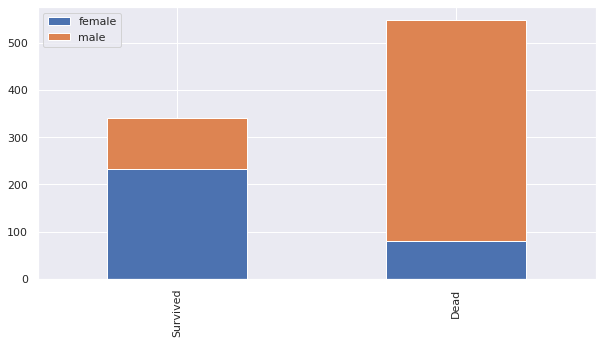

In [6]:
bar_chart('Sex')
# 성별이 죽었는지 살았는지에 대해 얼마나 영향을 미쳤는지 보여줌

여성 승객은 비교적 많이 생존한 것에 비해, 남성 승객은 높은비율로 사망한 것을 알 수 있습니다. 당시 상황으로 여성들을 먼저 대피시켰을 수도 있다는 가설을 세울 수 있습니다.

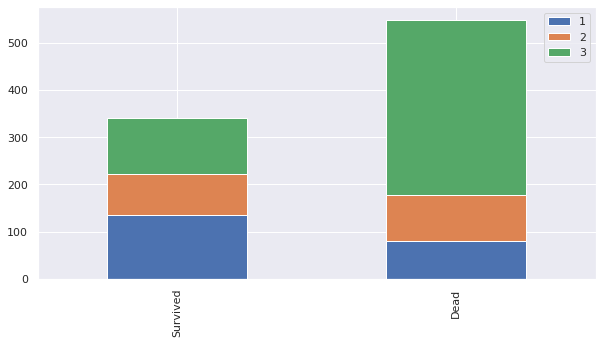

In [7]:
bar_chart('Pclass')
# 객실 등급에 따라 생존율을 나타냄


1등급 객실에 탑승했던 승객이 3등급 객실에 탑승했던 승객에 비해 높은 비율로 살아남았다는 것을 알 수 있습니다. 역시 1등급 객실에 탑승한 승객들을 먼저 대피시켰을 수도 있다는 가설을 세울 수 있습니다.

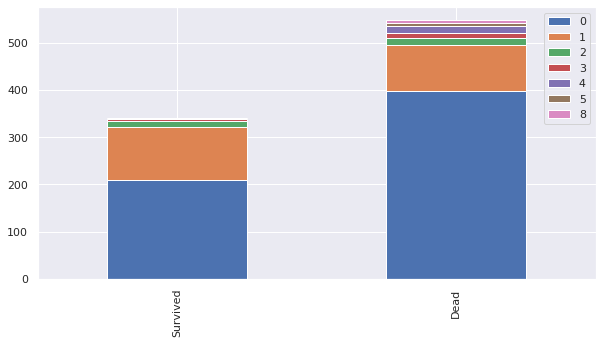

In [8]:
bar_chart('SibSp')
# 가족이나 친척의 숫자에 따른 생존율을 나타냄

크게 눈에 띌만한 유의미한 결과를 찾기 어려웠습니다. 친척/가족 1명과 함께 탑승한 인원은 다른 인원에 비해 생존률이 아주 조금 높았고, 3명 이상의 가족과 함께 탑승한 인원은 대부분 사망한 것을 알 수 있습니다.

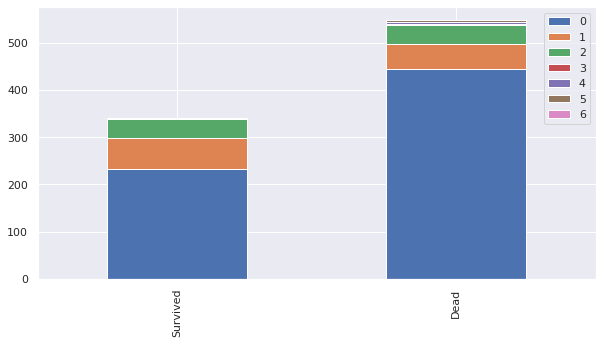

In [9]:
bar_chart('Parch')
# 부모 혹은 자녀와 함께 탑승했는지 여부에 따른 생존율을 나타냄

역시 유의미한 결과를 찾기 어려웠습니다. 위와 마찬가지로 부모/자녀 1명과 함께 탑승한 인원은 생존율이 아주 약간 높았으나, 눈에 띌 정도는 아닙니다. 마찬가지로 3명 이상 함께 탑승한 승객들은 거의 대부분 사망하였음.

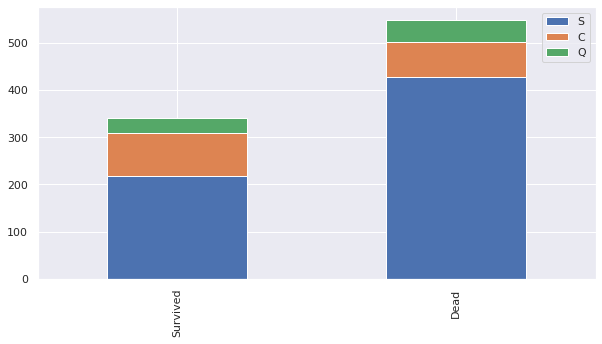

In [10]:
bar_chart('Embarked')
# 승선위치에 따른 생존률을 나타냄

마찬가지로 유의미한 결과는 찾기 어려웠습니다.

<br>

이름 데이터는 자연어이기 때문에 숫자로 바꿔주어야 합니다. 때문에 이름의 앞에 들어가는 호칭을 잘라서 호칭 단위로 다른 숫자를 대입하도록 합시다. 이름의 경우는 너무 다양하기 때문에 호칭을 사용하면 어느정도 나이나 성별등의 특징을 반영할 수 있을 것이라고 판단했습니다.

In [11]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

Mr, Master, Miss, Mrs 등의 이름이 자주 등장하였습니다. 검색 결과 영어 호칭은 아래와 같은 의미가 있다고 합니다.

- Mr : 기혼 남성
- Miss : 미혼 여성
- Mrs  : 기혼 여성
- Master : 미혼 남성
- Dr : 박사님
- Rev : 신부님
- Col : 대장님
- Mlle : 미혼 여성
- Major : 군 장교
- Ms : 여성
- Capt : 대위, 선장
- Don : 귀족
- Lady : 여성
- Mme : 기혼 여성 (마담)
- Countess : 귀족
- Jonkheer : 귀족
- Sir : 경

저는 이것을 아래와 같이 축약하기로 했습니다.

0. Miss (미혼여성) : Miss + Mlle + Lady 
1. Mrs (기혼여성) : Mrs + Ms + Mme 
2.  Master (미혼남성) : Master
3.  Mr (기혼남성) : Mr
4.  Upper (상류층) : Dr + Rev + Col + Major + Capt + Don + Countess + Jonkheer + Sir

In [12]:
title_mapping = {'Miss' : 0, 'Mlle' : 0, 'Lady' : 0,
                 'Mrs' : 1,  'Ms' : 1, 'Mme' : 1,
                 'Master' : 2,
                 'Mr' : 3,
                 'Dr' : 4, 'Rev' : 4, 'Col' : 4, 
                 'Major' : 4, 'Capt' : 4, 'Don' : 4,
                 'Countess' : 4, 'Jonkheer':4, 'Sir':4}


dataset['Title'] = dataset['Title'].map(title_mapping)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


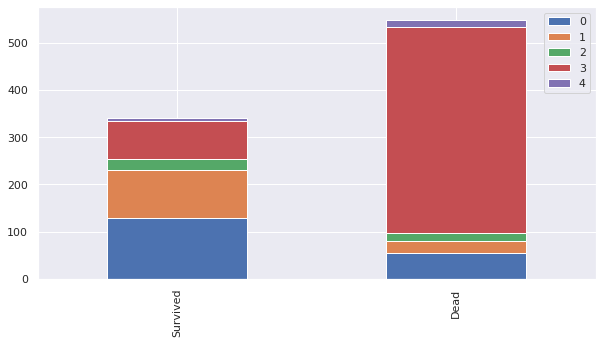

In [13]:
bar_chart('Title')
dataset.info()

이름 타이틀에서 유의미한 결과를 찾아내었습니다. 대부분의 여성들 (0, 1)은 거의 살았으며, 많은 남성들(2, 3)은 생존하지 못했습니다. 이제 더 이상 이름 열이 필요없기 때문에 제거합니다.

In [14]:
dataset = dataset.drop('Name', axis=1)

<br>

그 다음, 성별을 숫자로 맵핑시킵니다.

In [15]:
dataset['Sex'] = dataset['Sex'].map({"male": 0, "female": 1})

<br>

위에서 말한 것 처럼 타이타닉 데이터셋은 결측치를 가지고 있고, 가장 먼저 Age를 다뤄보도록 하겠습니다.

In [16]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

나이가 유실된 승객이 많으니, fillna를 써서 유실된 값들을 채워줍니다. 아까 이름에서 얻었던 Mrs, Miss, Mrs 등의 정보를 활용합니다. 예를 들어 만약 나이가 유실된 승객의 타이틀이 Mrs면 Mrs의 평균 나이를 넣고, Miss면 Miss의 평균 나이를 넣는 식으로 채우려고 합니다.

In [ ]:
ages = dataset.groupby("Title")["Age"].transform("mean").round()
dataset['Age'] = dataset["Age"].fillna(ages)

이제 모든 나이 유실값이 제거되었습니다.

In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [ ]:
# 나이에 따른 생존률을 그래프로 출력하는 함수를 만듬

def age_chart(to, end):
    facet = sns.FacetGrid(dataset, hue="Survived", aspect=4)
    facet.map(sns.kdeplot, 'Age', shade=True)
    facet.set(xlim=(0, dataset['Age'].max()))
    facet.add_legend()
    plt.xlim(to, end)

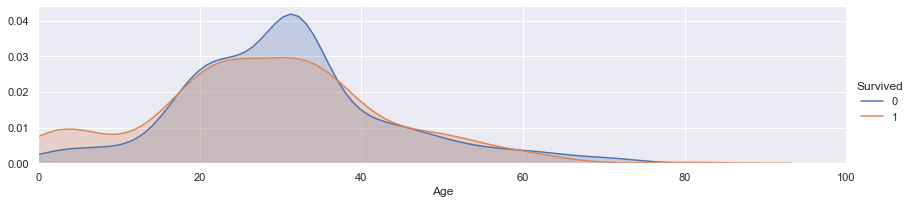

In [ ]:
# 전체 승객 출력
age_chart(0, 100)

20세 이하의 어린 승객들은 생존률이 높았고, 25~30세 부근의 승객들은 생존률이 낮았음을 알 수 있습니다. 당시에 어린이를 먼저 구출하려는 시도가 있었다고 예상해볼 수 있습니다.

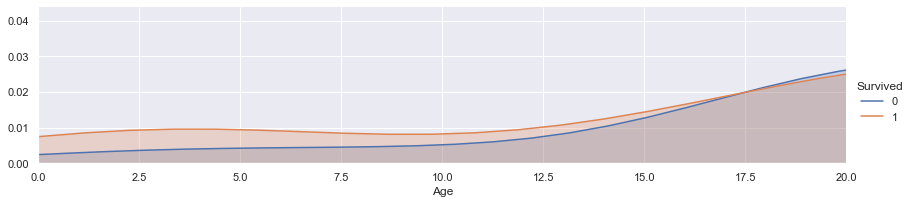

In [ ]:
# 어린 승객 출력
age_chart(0, 20)

17세 이상의 청년들은 생존율이 높지 않습니다.
즉, 17세 이하의 승객들을 먼저 구조하려는 움직임이 있었다고 예상해볼 수 있습니다.

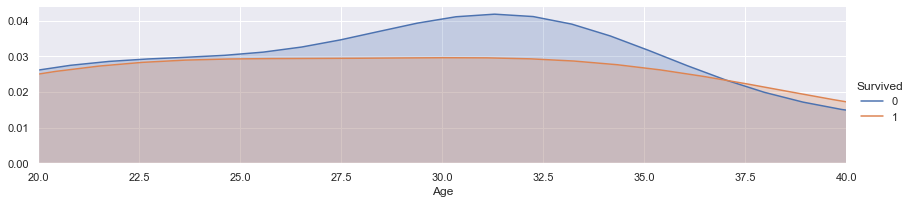

In [ ]:
# 중장년층 승객 출력
age_chart(20,40)

20대~30대 중반의 승객들은 유난히 사망률이 높은 것을 보아
이들은 어린 승객들을 구출하기 위해 희생하였다는 가설을 세울 수 있습니다.

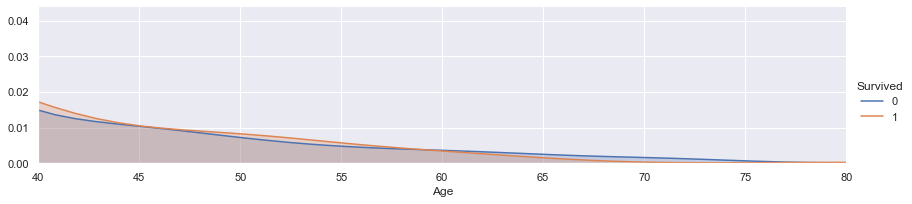

In [ ]:
# 장년-노인층 승객 출력
age_chart(40,80)

40대 이상의 승객들은 생존률과 사망률이 거의 비슷함을 알 수 있습니다. 이러한 정보에 입각하여 나이 데이터를 비닝(Binning)하겠습니다. **비닝(Binning)은 연속형 데이터를 범주형 데이터로 구분하는 것** 인데, 위에서 0 ~ 17세는 사망률이 낮고, 18~24는 비슷, 24 ~ 37은 사망률이 높았고, 그 이후로는 낮았습니다. 따라서 총 4개의 구간으로 데이터를 묶어서 이들의 특징이 모델로 하여금 학습될 수 있도록 하겠습니다.

In [ ]:
dataset.loc[dataset['Age'] <= 17, 'Age'] = 0,
dataset.loc[(dataset['Age'] > 17) & (dataset['Age'] <= 24), 'Age'] = 1,
dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 37), 'Age'] = 2,
dataset.loc[dataset['Age'] > 37, 'Age'] = 3

In [ ]:
dataset['Age']

0      1.0
1      3.0
2      2.0
3      2.0
4      2.0
      ... 
886    2.0
887    1.0
888    1.0
889    2.0
890    2.0
Name: Age, Length: 891, dtype: float64

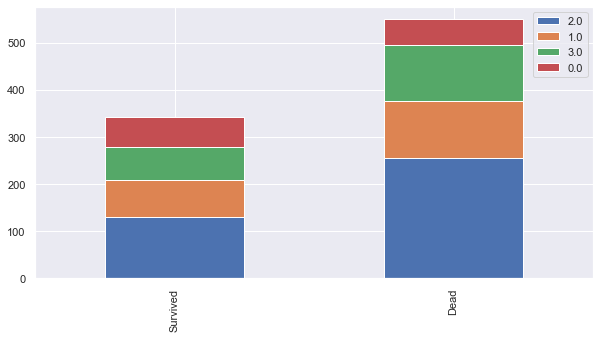

In [ ]:
bar_chart('Age')

확실히 2번(24세 ~ 37세)의 집단이 사망율이 확실히 높다는 것을 알게 되었습니다. 이름과 나이를 끝냈으니 이제 Embarked (승선 위치) 데이터를 분석해보겠습니다.

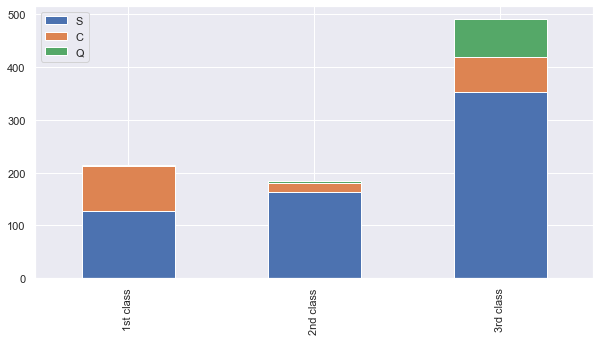

In [ ]:
Pclass1 = dataset[dataset['Pclass']==1]['Embarked'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Embarked'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Embarked'].value_counts()


df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

사우스햄튼에서 탑승한 승객이 제일 많았으며, 셰르부르에서 탑승한 승객은 1등석에 많이 탑승한 것을 보아 셰르부르에서 탑승한 승객들은 더욱 부자일 것이고 퀸즈타운에서 탑승한 승객들은 거의 대부분 3등석이므로, 더욱 가난할 것이라고 가정할 수 있습니다.

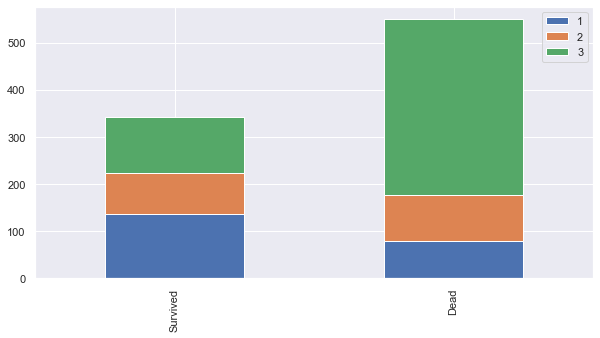

In [ ]:
bar_chart('Pclass')

3등석에 탑승한 승객들은 대부분 죽었고, 1등석에 탑승한 승객은 대부분 살았으므로,
퀸즈타운에서 탑승한 승객은 대부분 죽었고, 셰르부르에서 탑승한 승객은 그나마 높은 확률로 살아남았을수 있습니다. 실제 Embarked 데이터를 보면 이와같은 사실을 파악할 수 있습니다. 그러나 2개의 Embark가 유실되어 메꿔줘야합니다.

In [ ]:
null_embark_train = dataset['Embarked'].isnull()

for i in zip(range(1, null_embark_train .size), null_embark_train):
    if i[1]: print('유실된 트레이닝 데이터: ', i)

유실된 트레이닝 데이터:  (62, True)
유실된 트레이닝 데이터:  (830, True)


데이터의 62번 승객과 830번 승객의 데이터가 유실되었습니다. 이 문제를 해결하기 위해 결측치를 채웁니다. <br><br>

모두 Pclass가 1이기 때문에, 1등석 승객들입니다. Pclass 가 1인 승객은 절반은 사우스햄튼, 절반은 셰르부르에서 탑승했기 때문에 한명은 셰르부르, 한명은 사우스햄튼에서 탑승한 것으로 처리합니다.

In [ ]:
dataset.loc[dataset['PassengerId'] == 62, 'Embarked'] = 'S',
dataset.loc[dataset['PassengerId'] == 830, 'Embarked'] = 'C',

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


마지막으로 Embark를 모두 숫자로 변경합니다.

In [ ]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

<br>

이제 Cabin 데이터를 처리합니다. Cabin 데이터는 대부분이 유실되었습니다. 

In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [ ]:
dataset.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
D6             1
C128           1
C104           1
D49            1
D7             1
Name: Cabin, Length: 147, dtype: int64

Cabin은 선실번호입니다. 선실번호는 좌석등급과 관련이 있기 떄문에 좌석 등급별로 잘라서 볼 필요가 있습니다.

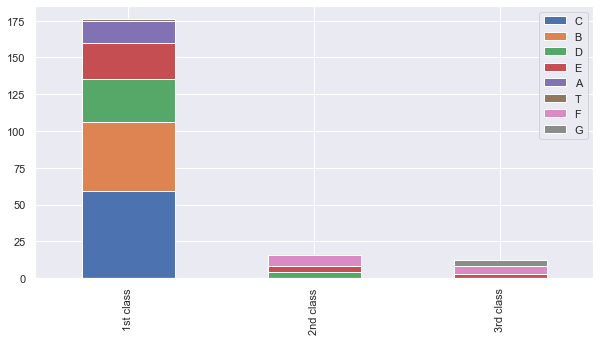

In [ ]:
dataset['Cabin'] = dataset['Cabin'].str[:1]


Pclass1 = dataset[dataset['Pclass']==1]['Cabin'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Cabin'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

2등석은 D와 E가 25%씩, F가 50% 정도를 차지하고 있는 것을 알 수 있고 3등석은 G가 30% F가 40% E가 20% 정도 차지하고 있습니다. 1등석이 가장 많은 Cabin 데이터를 보유하고있는데, C, B, D, E, A 순으로 보유하고있는것을 알 수 있습니다. **1등석이 가장 많은 Cabin 데이터를 보유**하고있는데, C, B, D, E, A 순으로 보유하고있는 것을 알 수 있습니다.

In [ ]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
dataset['Cabin'] = dataset["Cabin"].fillna(dataset.groupby("Pclass")["Cabin"].transform("mean"))

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 83.7+ KB


모든 유실데이터가 확보되었습니다. 계속해서 피쳐 추출을 진행하겠습니다. 친청의 수와 부모/자녀의 수는 비슷한 요소이기 때문에 '가족 사이즈'라는 컬럼으로 합치겠습니다.


In [ ]:
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

(0.0, 11.0)

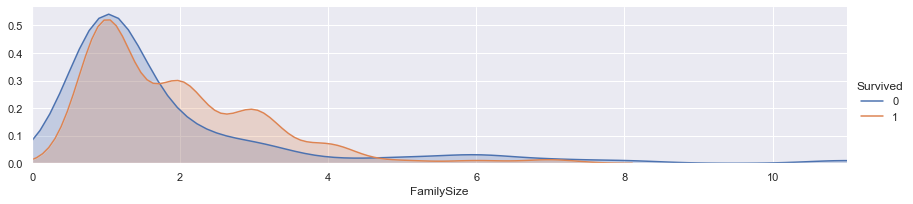

In [ ]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, dataset['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

너무 값이 크기 때문에 값을 일정 범위 내려줌 (Feature Scaling이라고 부름)

In [ ]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [ ]:
# 쓸모 없는 피쳐들을 지웁니다.
features_drop = ['Ticket', 'SibSp', 'Parch', 'PassengerId']
dataset = dataset.drop(features_drop, axis=1)

label = dataset['Survived']
dataset = dataset.drop('Survived', axis=1)

In [ ]:
split = int(0.8 * len(dataset))

train_feature = dataset[:split]
train_label = label[:split]

test_feature = dataset[split:]
test_label = label[split:]

<br>

이제 SVM 모델을 써서 예측을 수행해봅시다.


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model = SVC()
model.fit(train_feature, train_label)
pred = model.predict(test_feature)
accuracy_score(test_label, pred)

0.7150837988826816

In [ ]:
print(classification_report(test_label, pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       115
           1       0.76      0.30      0.43        64

    accuracy                           0.72       179
   macro avg       0.73      0.62      0.62       179
weighted avg       0.73      0.72      0.67       179



성능이 매우 저조합니다. `gamma`와 `C`값을 설정하지 않은 탓인데요. `GridSearchCV`를 이용해 최적의 파라미터를 탐색할 수 있습니다.

In [ ]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid={'gamma':[0.001, 0.01, 0.1, 1.0, 3.0, 5.0, 10.0],
               'C':[0.001, 0.01, 0.1, 1.0, 3.0, 5.0, 10.0]}
)

grid_search.fit(train_feature, train_label)
grid_search.best_params_

{'C': 5.0, 'gamma': 0.1}

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(C=5.0, gamma=0.1)
model.fit(train_feature, train_label)
pred = model.predict(test_feature)
accuracy_score(test_label, pred)

0.8491620111731844

In [ ]:
print(classification_report(test_label, pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       115
           1       0.81      0.75      0.78        64

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



최적의 파라미터인 C=5.0과 gamma=0.1을 이용해 성능을 5% 끌어올렸습니다. 여기에 표준화를 진행해봅시다.

In [ ]:
dataset = (dataset - dataset.mean()) / dataset.std()

train_feature = dataset[:split]
train_label = label[:split]

test_feature = dataset[split:]
test_label = label[split:]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(C=5.0, gamma=0.1)
model.fit(train_feature, train_label)
pred = model.predict(test_feature)
accuracy_score(test_label, pred)

0.8770949720670391

In [ ]:
print(classification_report(test_label, pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       115
           1       0.90      0.73      0.81        64

    accuracy                           0.88       179
   macro avg       0.88      0.85      0.86       179
weighted avg       0.88      0.88      0.87       179



표준화는 이렇게 대부분 성능이 오르게 해주는 도구 중 한가지 입니다. 87%로, 이전보다 훨씬 만족스러운 성능을 얻었습니다. 타이타닉모델의 경우 새로운 데이터가 생성되지 않기 때문에 모델을 저장하지 않았습니다.

<br>

### 6. SVM의 장점
- 마진(Margin)을 벌림으로써 분류 성능을 최대한 높힙니다.
- Soft Margin 기법을 활용하여 이상치(Outlier)에 강인한 모습을 보여줍니다.
- 커널(Kernel)함수를 도입하여 비선형 분류가 가능합니다.

<br>

### 7. SVM의 단점
- 파라미터 설정에 굉장히 민감합니다. (성능이 크게 바뀌는 경우도 많음)

<br>

### 8. SVM Regression

`sklearn`에는 `from sklearn.svm` 패키지 안에 `SVC`클래스와 `SVR`클래스를 함께 지원합니다. 이 때, `SVC`클래스는 Support Vector Machine Classifier를 의미합니다. 즉, 분류모델로 사용되는 모델입니다. 그에 비해 `SVR`클래스는 Support Vector Machine Regressor를 의미합니다. 즉, 회귀모델로 사용되는 모델입니다. 분류, 회귀 둘다 가능한 모델이니 회귀를 해야한다면 `SVR`도 고려해보시길 바랍니다.